# 6. Graphics

At the moment, Julia does not have any graphics functionality "built-in". Instead, these are provided by 3rd party libraries.

Of these, the best is currently Gadfly.

To install, use `Pkg.add("Gadfly")`

## Gadfly

Gadfly is based on the "Grammar of Graphics" by Leland Wilkinson, similar to the `ggplot2` package in R (but without the abuse of `+`).

By default, the output plots are interactive SVG images.

In [1]:
using Gadfly

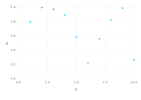

In [2]:
plot(x=1:10,y=rand(10))

There are various aesthetics that can be modified.

The *coordinates* of the plot are provided by keyword arguments (e.g. `x`, `y`, `color`)

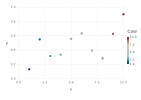

In [3]:
plot(x=1:10,y=rand(10),color=1:10)

The *Geom* specify the type of plot: these are provided as extra arguments.

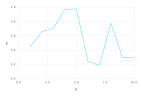

In [4]:
plot(x=1:10,y=rand(10),Geom.line)

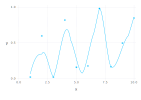

In [17]:
plot(x=1:10,y=rand(10),Geom.point,Geom.smooth(method=:loess,smoothing=0.5)) # can have multiple Geoms

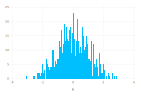

In [6]:
plot(x=randn(1000),Geom.histogram)

The *Scale* objects determine the mapping between data and coordinates

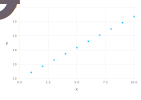

In [7]:
plot(x=1:10,y=exp(1:10),Scale.y_log10)

*Guide* objects provide extra detail, typically outside the plotting area.

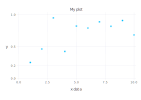

In [8]:
plot(x=1:10,y=rand(10),
   Guide.title("My plot"),Guide.xlabel("x data"),Guide.yticks(ticks=[0,0.2,0.5,1]))

There is also a simple, but distinct, interface for plotting functions

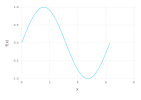

In [9]:
plot(sin,0,2pi)

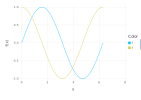

In [10]:
plot([sin,cos],0,2pi)

Multiple elements can be combined with `layer`:

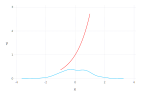

In [11]:
plot(
layer(x=randn(100),Geom.density),
layer(exp,-1,1,Theme(default_color=colorant"red")))

### Alternatives

Gadfly does have some drawbacks (it is slow for large numbers of points). Some alternatives:

* Winston.jl: fairly simple plotting using the Cairo library
* PyPlot.jl: Julia interface to the Python matplotlib
* PGFPlots.jl: Outputs nice PGF graphics for inclusion in LaTeX
* ASCIIPlots.jl: For when nothing else works.
* RCall.jl: the R-Julia interface.